<a href="https://colab.research.google.com/github/Raexann/Models/blob/main/SimpleRNN_with_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

In [ ]:
#load the dataset
(x_train, y_train), (x_test, y_test) =mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#compute no. of labels
num_labels=len(np.unique(y_train))

In [ ]:
print(num_labels)

10


In [ ]:
#convert to one-hot vector
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#resize and normalize
image_size=x_train.shape[1]
x_train=np.reshape(x_train, [-1, image_size, image_size])
print(x_train.shape)

x_test=np.reshape(x_test, [-1, image_size, image_size])
print(x_test.shape)

x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
input_shape=(image_size, image_size)
batch_size=128
units=28
dropout=0.2

In [ ]:
#building RNN model
model=Sequential()
model.add(SimpleRNN(units=units,
                    input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 28)                1596      
                                                                 
 dense (Dense)               (None, 10)                290       
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 1,886
Trainable params: 1,886
Non-trainable params: 0
_________________________________________________________________


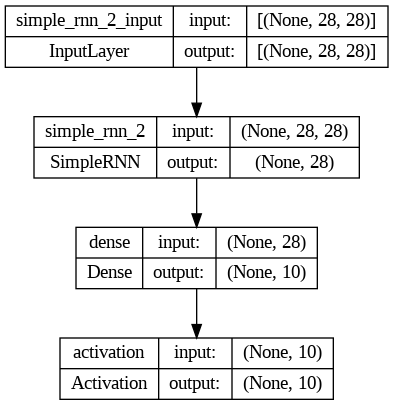

In [ ]:
plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

In [ ]:
#compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 5s 8ms/step - loss: 1.8604 - accuracy: 0.3449
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 1.2735 - accuracy: 0.5630
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 1.0422 - accuracy: 0.6495
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.9086 - accuracy: 0.6991
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.8233 - accuracy: 0.7300
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.7443 - accuracy: 0.7627
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.6756 - accuracy: 0.7915
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.6052 - accuracy: 0.8199
Epoch 9/20
469/469 [==============================] - 7s 14ms/step - loss: 0.5494 - accuracy: 0.8373
Epoch 10/20
469/469 [==============================] - 7s 14ms/step - loss: 0.5103 - accuracy: 0.

In [ ]:
loss, acc=model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0*acc))

79/79 [==============================] - 1s 5ms/step - loss: 0.3234 - accuracy: 0.9129

Test accuracy: 91.3%
